<a href="https://colab.research.google.com/github/Krishks369/TASK_1_heartDisease_classification/blob/main/notebooks/heart_disease_with_random_forest_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/Krishks369/TASK_1_heartDisease_classification/main/data/heart.csv')

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

+ We can see that our dataset contains all numerical variables.

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

+ Our dataset does not have any missing values.

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Visualize Dataset

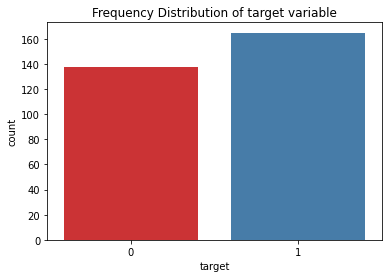

In [12]:
sns.countplot(x='target', data=df, palette='Set1')
plt.title('Frequency Distribution of target variable')
plt.show()

[]

<Figure size 720x576 with 0 Axes>

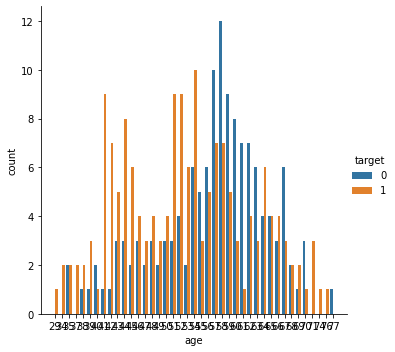

In [13]:
plt.figure(figsize=(10,8))
sns.catplot(x='age',hue='target',data=df,kind="count")
plt.plot()

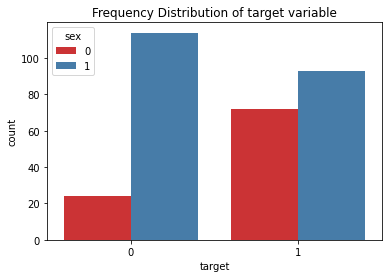

In [14]:
sns.countplot(x='target', hue='sex', data=df, palette='Set1')
plt.title('Frequency Distribution of target variable')
plt.show()

In [16]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure','cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina','st_depression','st_slope','num_major_vessels','thalassemia','target']

In [17]:
df['sex'][df['sex']==0] = 'female'
df['sex'][df['sex']==1] = 'male'

df['chest_pain_type'][df['chest_pain_type']==1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type']==2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type']==3] = 'non-angina pain'
df['chest_pain_type'][df['chest_pain_type']==4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar']==0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar']==1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg']==0] = 'normal'
df['rest_ecg'][df['rest_ecg']==1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg']==2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina']==0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina']==1] = 'yes'

df['st_slope'][df['st_slope']==1] = 'upsloping'
df['st_slope'][df['st_slope']==2] = 'flat'
df['st_slope'][df['st_slope']==3] = 'downsloping'

df['thalassemia'][df['thalassemia']==1] = 'normal'
df['thalassemia'][df['thalassemia']==2] = 'fixed defect'
df['thalassemia'][df['thalassemia']==3] = 'reversable defect'

In [18]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [19]:
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

In [20]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [21]:
df = pd.get_dummies(df, drop_first=True)

In [22]:
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-angina pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


In [23]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [25]:
print('X-train shape: ', X_train.shape)
print('X-test shape: ', X_test.shape)

X-train shape:  (242, 13)
X-test shape:  (61, 13)


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [27]:
estimator = rf.estimators_[1]
features = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str=='0'] == 'no disease'
y_train_str[y_train_str=='1'] == 'disease'
y_train_str = y_train_str.values

In [28]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  3],
       [14, 19]])